<a href="https://colab.research.google.com/github/leihuang/scrapbook/blob/master/income_tax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019 federal income tax brackets

https://www.nerdwallet.com/blog/taxes/federal-income-tax-brackets/

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
brackets = np.array([0, 9701, 39475, 84201, 160725, 204101, 510300, 1000000])
trates = np.array([10, 12, 22, 24, 32, 35, 37]) / 100

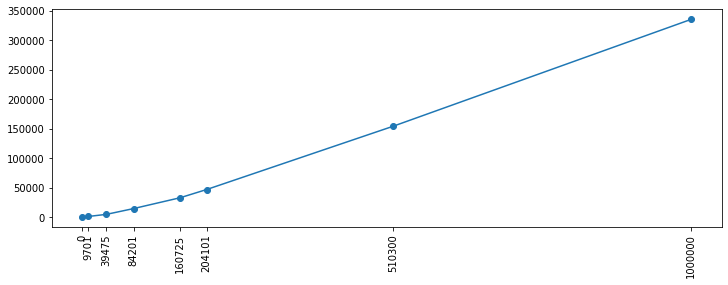

In [71]:
fig, ax = plt.subplots(figsize=(12,4))
x = brackets
y = (x[1:] - x[:-1]) * trates
ax.plot(x, [0]+np.cumsum(y).tolist(), '-o')
ax.set_xticks(brackets)
ax.set_xticklabels(brackets, rotation=90)
# ax.set_xscale('log')
plt.show()

In [72]:
brackets, trates

(array([      0,    9701,   39475,   84201,  160725,  204101,  510300,
        1000000]), array([0.1 , 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]))

In [0]:
def get_tax(income):
    tax = 0
    intervals = brackets[1:] - brackets[:-1]
    for interval, rate in zip(intervals, trates):        
        if income >= interval:
            tax = tax + interval * rate
            income = income - interval
        else:
            tax = tax + income * rate
            break
    return tax


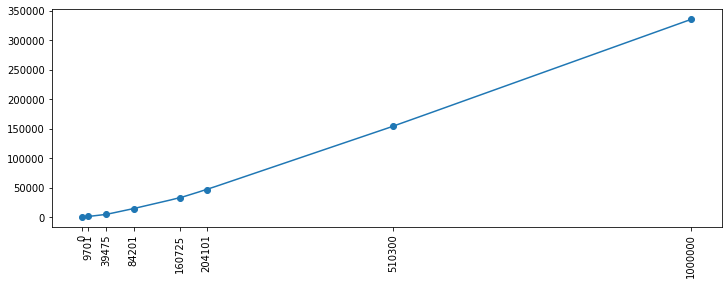

In [74]:
fig, ax = plt.subplots(figsize=(12,4))
x2 = np.logspace(0, np.log10(brackets[-1]), 101)
y2 = [get_tax(x_) for x_ in x2]
ax.plot(x2, y2, '-')
ax.scatter(x, [0]+np.cumsum(y).tolist())
ax.set_xticks(brackets)
ax.set_xticklabels(brackets, rotation=90)
# ax.set_xscale('log')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


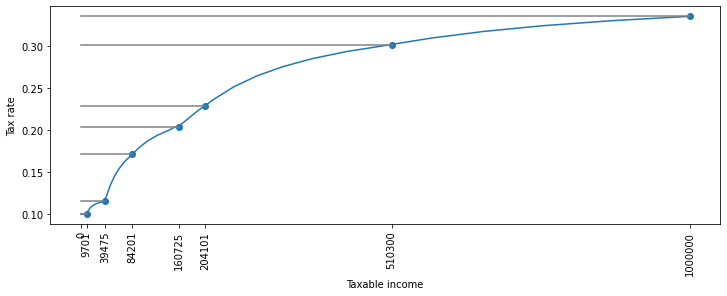

In [75]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x2, y2/x2, '-')
y3 = [get_tax(x_)/x_ for x_ in x]
ax.scatter(x, y3)
for x_, y_ in zip(x, y3):
    ax.plot([0, x_], [y_, y_], color='grey')
ax.set_xticks(brackets)
ax.set_xticklabels(brackets, rotation=90)
ax.set_xlabel('Taxable income')
ax.set_ylabel('Tax rate')
plt.show()